C:\Users\lori2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

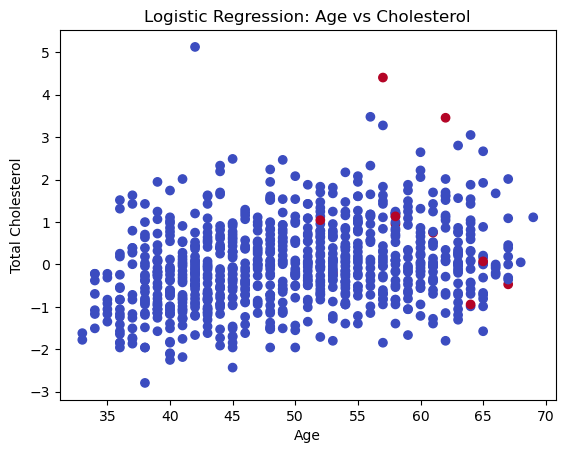

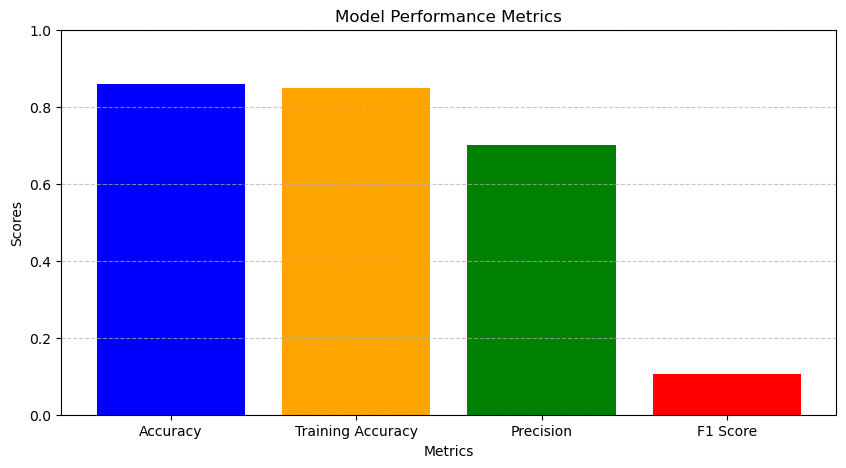

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, r2_score, f1_score
from sklearn.preprocessing import StandardScaler 
import time
import pandas as pd
import matplotlib.pyplot as plt



cancer_research = pd.read_csv('framingham.csv')

#missing values were checked using the code from line 18-21. Since the data is mixed with categorical values 
# and non-categorical(contiuous) values, mode imputation was used on categorical values and mean() was used on numerical
# data to avoid any biased data.

categoricalColumns = ['cigsPerDay','BPMeds', 'education']
cancer_research[categoricalColumns] = cancer_research[categoricalColumns].fillna(cancer_research[categoricalColumns].mode().iloc[0])
    
numericalColumns = ['totChol', 'BMI', 'heartRate', 'glucose']
cancer_research[numericalColumns] = cancer_research[numericalColumns].fillna(cancer_research[numericalColumns].mean().iloc[0])
                                                    
# Check for missing values in each column
#missing_values = cancer_research.isna().sum()

# Display columns with only the missing values
#print(missing_values[missing_values > 0])
#print("\n")
#print(cancer_research.head())
#cancer_research.dropna()
#cancer_research.isna()


scaler = StandardScaler()
cancer_research[numericalColumns] = scaler.fit_transform(cancer_research[numericalColumns])
#print(cancer_research)

# excludes heart disease prediction column, axis = 1 : columns; axis = 0 ; rows
x = cancer_research.drop('TenYearCHD', axis=1)
y = cancer_research['TenYearCHD']

#splits the data into testing and training the algorithm
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

start_time = time.time()

data_model = LogisticRegression(solver='lbfgs', penalty = 'l2', class_weight={0: 9, 1: 10}, C=5)
data_model.fit(x_train, y_train)

end_time = time.time()
cpu_time = end_time - start_time


#call the predict method and passes x_test as the argument
yPrediction = data_model.predict(x_test)
print(yPrediction)

y_train_predict = data_model.predict(x_train)

x_test_with_predictions = x_test.copy()  # Make a copy of x_test
x_test_with_predictions['Predicted_TenYearCHD'] = yPrediction

# Show the combined DataFrame with predictions
#print(x_test_with_predictions)  # Display first few rows



accuracy = accuracy_score(y_test, yPrediction)
print(f'Accuracy: {accuracy:.2f}')

train_accuracy = accuracy_score(y_train, y_train_predict)
print(f'Training Accuracy: {train_accuracy:.2f}')

precision_score = precision_score(y_test, yPrediction) 
print(f'Precision: {precision_score:.2f}')

f1_score = f1_score(y_test, yPrediction)
print(f'F1 score: {f1_score:.2f}')

print("CPU Time",cpu_time,"\n")


plt.scatter(x_test['age'], x_test['totChol'], c=yPrediction, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.title('Logistic Regression: Age vs Cholesterol')
plt.savefig('regression2.png', bbox_inches='tight')
plt.show()



metrics = [accuracy, train_accuracy, precision_score, f1_score]
metric_names = ['Accuracy', 'Training Accuracy', 'Precision', 'F1 Score']

plt.figure(figsize=(10, 5))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set y-axis limits
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('logistic2.png', bbox_inches='tight')

plt.show()
